# Importing basic packages

In [19]:
import re
import sys
import time
import datetime
import requests
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------
from sklearn.datasets import fetch_20newsgroups
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Get the corrent time

In [20]:
def get_time():
    return int(time.time())

# Get yahoo finance historical data using api and make csv file

In [21]:
def get_data(symbol):
    filename = '%s.csv' % (symbol)
    start_date = 0
    end_date = get_time()
    headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36'}
    url = "https://query1.finance.yahoo.com/v7/finance/download/%s?period1=%s&period2=%s&interval=1d&events=history" % (symbol, start_date, end_date)
    response = requests.get(url, headers=headers)
    with open (filename, 'wb') as handle:
        for block in response.iter_content(1024):
            handle.write(block)
    

# Dropping all duplicate values and unnecessary columns

In [22]:
def clean_df(df):
    # dropping ALL duplicate values
    df.drop_duplicates(subset=['Date'], keep=False, inplace=True)
    # drop unnecessary columns
    columns_valid = (set(list(df.columns)) - set(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']))
    if columns_valid != set():
        for col in columns_valid:
            del df[col]
    # if mor than 10% of the values is null scrape again
    null_rows = df.isnull().sum().sum()
    if null_rows > 1000:
        symbol = 'TSLA'
        get_df(symbol)

In [23]:

def plot_series(time, series, format="-", start=0, end=None, label=None):

    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

# Machine learning modules

# Creating the Naive bayes model

In [24]:
def naive(df):
    keras = tf.keras

    df['Date'] = pd.to_datetime(df['Date'])
    df.tail(100)
    df.dropna(inplace=True)

    series = df['Close']
    # Create train data set from the given date
    train_split_date = '2001-02-03'
    train_split_index = (train_split_date)[0][0]
    x_train = df.loc[df['Date'] <= train_split_date]['Close']

    # Create test data set from the given date
    test_split_date = '2021-02-03'
    test_split_index = np.where(df.Date == test_split_date)[0][0]
    x_test = df.loc[df['Date'] >= test_split_date]['Close']

    # Create valid data set
    x_valid = df.loc[(df['Date'] < test_split_date) & (df['Date'] > train_split_date)]['Close']


    model_mae_scores = {}

    naive_forecast = series[test_split_index - 1:-1]

    plt.figure(figsize=(10, 6))
    plot_series(x_test.index, x_test, label="Actual")
    plot_series(x_test.index, naive_forecast, label="Forecast")
    plt.ylabel('Dollars $')
    plt.xlabel('Timestep in Days')
    plt.title('Naive Forecast vs Actual')
    plt.show()

    # Alternative way to show MAE to stay consistent with what we will be doing later
    naive_forecast_mae = keras.metrics.mean_absolute_error(x_test, naive_forecast).numpy()
    model_mae_scores['naive'] = naive_forecast_mae

    # view the dictionary of mae scores
    print(model_mae_scores)
    return model_mae_scores
    # Show first 3 values of our forecast

# creating the Decision tree model

In [25]:
def decision_tree(df):

    df['Date'] = pd.to_numeric(pd.to_datetime(df['Date']))

    # Create plot for the initial data
    sns.set()
    plt.figure(figsize=(10, 6))
    plt.title("Stock Price")
    plt.xlabel("Days")
    plt.ylabel("Close Price USD ($)")
    plt.plot(df["Close"])
    plt.show()

    # shift(remove) the data for the last 30 days for the prediction results
    futureDays = 30
    df["Prediction"] = df[["Close"]].shift(-futureDays)
    print(df.head())
    print(df.tail())

    x = np.array(df.drop(["Prediction"], 1))[:-futureDays]
    y = np.array(df["Prediction"])[:-futureDays]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

    tree = DecisionTreeRegressor().fit(x_train, y_train)

    xfuture = df.drop(["Prediction"], 1)[:-futureDays]
    xfuture = xfuture.tail(futureDays)
    xfuture = np.array(xfuture)

    treePrediction = tree.predict(xfuture)
    print("Decision Tree prediction =",treePrediction)

    predictions = treePrediction
    valid = df[x.shape[0]:]
    valid["Predictions"] = predictions
    plt.figure(figsize=(10, 5))
    plt.title("Stock Price Prediction Model(Decision Tree Regression Model)")
    plt.xlabel("Days")
    plt.ylabel("Close Price USD ($)")
    plt.plot(df["Close"])
    plt.plot(valid[["Close", "Predictions"]])
    plt.legend(["Original", "Valid", "Predictions"])
    plt.show()
    
    y_pred = tree.predict(x_test)

    # Compute mse_dt
    mse_dt = MSE(y_test, y_pred)

    # Compute rmse_dt
    rmse_dt = mse_dt**(1/2)

    # Print rmse_dt
    print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

    return rmse_dt
    

# Creating the Linear Regression model

In [26]:

def Linear_Regression(df):

    df['Date'] = pd.to_numeric(pd.to_datetime(df['Date']))

    # shift(remove) the data for the last 30 days for the prediction results
    futureDays = 30
    df["Prediction"] = df[["Close"]].shift(-futureDays)

    x = np.array(df.drop(["Prediction"], 1))[:-futureDays]
    y = np.array(df["Prediction"])[:-futureDays]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

    # creating the Linear Regression model
    linear = LinearRegression().fit(x_train, y_train)

    xfuture = df.drop(["Prediction"], 1)[:-futureDays]
    xfuture = xfuture.tail(futureDays)
    xfuture = np.array(xfuture)

    linearPrediction = linear.predict(xfuture)
    print("Linear regression Prediction =",linearPrediction)
    
    predictions = linearPrediction
    valid = df[x.shape[0]:]
    valid["Predictions"] = predictions
    plt.figure(figsize=(10, 6))
    plt.title("Stock Price Prediction Model(Linear Regression Model)")
    plt.xlabel("Days")
    plt.ylabel("Close Price USD ($)")
    plt.plot(df["Close"])
    plt.plot(valid[["Close", "Predictions"]])
    plt.legend(["Original", "Valid", "Predictions"])
    plt.show()
    
    y_pred = linear.predict(x_test)
    
    # Compute mse_dt
    mse_dt = MSE(y_test, y_pred)

    # Compute rmse_dt
    rmse_dt = mse_dt**(1/2)

    # Print rmse_dt
    print("Test set RMSE of LR: {:.2f}".format(rmse_dt))

    return rmse_dt

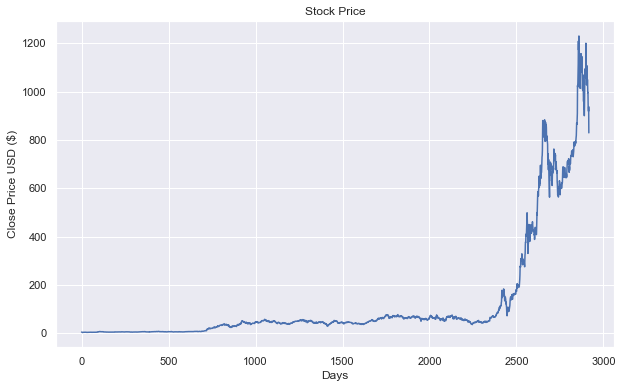

                  Date  Open  High   Low  Close  Adj Close    Volume  \
0  1277769600000000000 3.800 5.000 3.508  4.778      4.778  93831500   
1  1277856000000000000 5.158 6.084 4.660  4.766      4.766  85935500   
2  1277942400000000000 5.000 5.184 4.054  4.392      4.392  41094000   
3  1278028800000000000 4.600 4.620 3.742  3.840      3.840  25699000   
4  1278374400000000000 4.000 4.000 3.166  3.222      3.222  34334500   

   Prediction  
0       3.580  
1       3.520  
2       3.664  
3       3.756  
4       3.830  
                     Date    Open     High     Low   Close  Adj Close  \
2912  1642723200000000000 996.340 1004.550 940.500 943.900    943.900   
2913  1642982400000000000 904.760  933.510 851.470 930.000    930.000   
2914  1643068800000000000 914.200  951.260 903.210 918.400    918.400   
2915  1643155200000000000 952.430  987.690 906.000 937.410    937.410   
2916  1643241600000000000 933.360  934.750 829.000 829.100    829.100   

        Volume  Prediction  
291

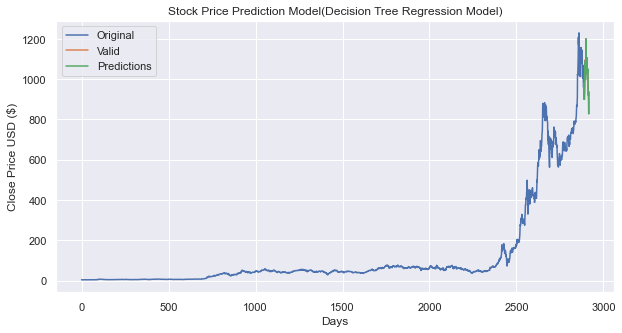

Test set RMSE of dt: 14.02


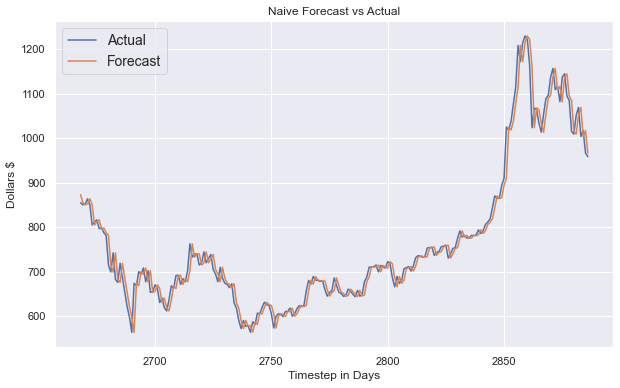

{'naive': 18.50374260273973}
Linear regression Prediction = [ 813.20305203  824.36529624  830.51186277  840.28364011  863.94663192
  859.6729821   860.28180492  858.03558758  853.13535947  867.92169777
  862.72526998  859.33575176  872.13655925  868.57643904  871.63812182
  885.08649268  892.27507128  899.20810423  918.51873873  949.4219393
  955.53119128  950.69395387  966.84584188  992.05180728 1093.99008293
 1130.33647272 1143.39764539 1173.9827676  1204.42567399 1288.92127526]


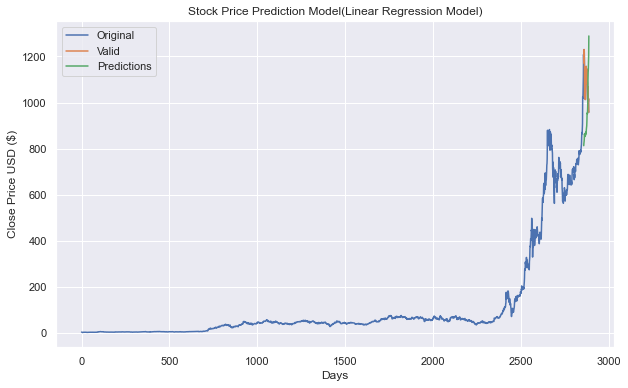

Test set RMSE of LR: 52.22


<AxesSubplot:>

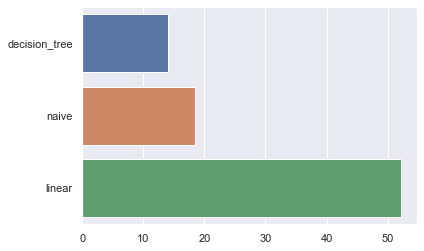

In [27]:
if __name__ == "__main__":
    # Get data
    symbol = 'TSLA'
    get_data(symbol)
    model_mae_scores = {}
    df = pd.read_csv('TSLA.csv')
    clean_df(df)
    dt_mean_ava_err = decision_tree(df)
    model_mae_scores['decision_tree'] = dt_mean_ava_err
    naive_mean_ava_err = naive(df)
    model_mae_scores['naive'] = naive_mean_ava_err['naive']
    linear_mean_ava_err = Linear_Regression(df)
    model_mae_scores['linear'] = linear_mean_ava_err
    
    mae_series = pd.Series(model_mae_scores)
    order = mae_series.sort_values()
    sns.barplot(x=order.values, y=order.index, orient='h')
    